<h1> Checkpoint:</h1>

**Looking to see completion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [121]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [148]:
# let's rename our columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df.ENROLL_PREK+df.ENROLL_PRIMARY+df.ENROLL_HS)
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: **<Math for 8 grade>**   (Ex. Math for 8th grade)

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [127]:
len(df['YEAR'].unique().tolist())

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [128]:
michigan_avg = df[df['STATE'] == "MICHIGAN"]['AVG_MATH_8_SCORE'].mean()
ohio_avg = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()
if(michigan_avg > ohio_avg):
    print("Michigan")
else:
    print("Ohio")

Ohio


Find the average for your outcome score across all states in 2019

In [129]:
df[df["YEAR"] == 2019]['AVG_MATH_8_SCORE'].mean()

281.2641509433962

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [130]:
df2 = df.groupby('STATE')
df2['AVG_MATH_8_SCORE'].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [133]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<Instruction Expenditure per Student, Support Services Expenditure per Student\>**

Feature selection justification: **<I picked these features because they represent the total amount of time, money, and energy the state has spent on educating its students, such as hiring teachers, preparing practice material, and instructing its students. Therefore, I think that higher values on these features would correlate with higher scores on the math exam for 8th grade.\>**

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

Text(0.5, 1.0, 'Plot of Support Services Expenditure per Student vs. 8th Grade Math Score')

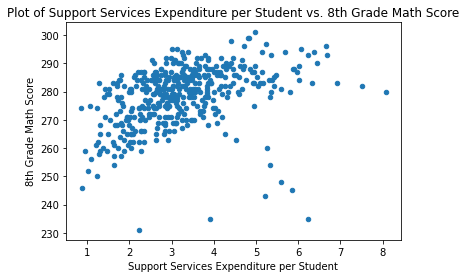

In [134]:
df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Support Services Expenditure per Student')
plt.ylabel('8th Grade Math Score')
plt.title('Plot of Support Services Expenditure per Student vs. 8th Grade Math Score')

**<This plot shows the relationship between the support services expenditure per student and the average 8th grade math score. As we can see from the data in the upper left-hand area of the scatter plot, there is a strong, positive, linear association between these two variables. There are also some outliers below this area.>**

**Visualization 2**

Text(0.5, 1.0, 'Plot of Instruction Expenditure per Student vs. 8th Grade Math Score')

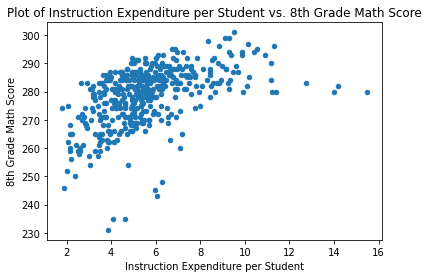

In [135]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT',y='AVG_MATH_8_SCORE')
plt.xlabel('Instruction Expenditure per Student')
plt.ylabel('8th Grade Math Score')
plt.title('Plot of Instruction Expenditure per Student vs. 8th Grade Math Score')

**<This plot shows the relationship between the instruction expenditure per student and the average 8th grade math score. As we can see from the data in the upper left-hand area of the scatter plot, there is a strong, positive, linear association between these two variables. There are also some outliers below this area.>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [204]:
from sklearn.model_selection import train_test_split

In [259]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.2, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: **<REGRESSION>**

In [261]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [262]:
# create your model here
model = LinearRegression()

In [264]:
model.fit(X_train, y_train)
print(model.intercept_)
print(model.coef_)
# R**2 value describes how well a linear model fits the data
print("R^2: %04f" % model.score(X_test, y_test))
# mean absolute error
print("Mean absolute error: %04f" % np.mean(np.abs(model.predict(X_test)-y_test)))
# root mean squared error -- penalizes large errors
print("Root mean squared error: %04f" % np.mean((model.predict(X_test)-y_test)**2)**0.5)

266.22201529806284
[ 4.19950281 -3.37018229]
R^2: 0.286320
Mean absolute error: 7.132159
Root mean squared error: 9.214356


In [265]:
y_pred = model.predict(X_test)

In [227]:
# FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                         cmap=plt.cm.Blues)

/Users/isabelwang/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Math 8 Score')

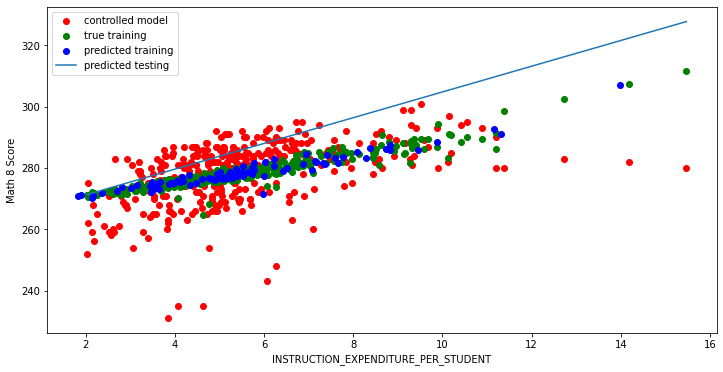

In [266]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 Score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS>**
**I wanted to find the impact of each state's instructional and support services expenditure on an average student's performance in 8th grade, as measured by their math score on the NAEP exam. Because each state's total expenditure in each of these categories is different based on the size of the state's population, I standardized these measures by finding the instruction expenditure per student and the support services expenditure per student. I defined Instruction Expenditure per Student as the Instruction Expenditure divided by the total enrollment (ENROLL_ALL) and Support Services Expenditure per Student as the Support Services Expenditure divided by the total enrollment (ENROLL_ALL). After running a linear regression on these explanatory variables versus the average Mathematics score for 8th graders, I found a positively-sloped fit line with a R^2 = 0.286320, mean absolute error = 7.132159, and root mean squared error = 9.214356. The fit line's positive slope indicates that there is a positive correlation between the two explanatory variables, instruction expenditure per student and support services expenditure per student, and the response variable, the average 8th grade math score on the NAEP exam. The small R^2 value indicates that this correlation is relatively weak, however, and that the linear model does not fit the data very well. This is further confirmed by the large mean absolute error and root mean squared error, which penalizes large deviations in the data from the fit line. States that spend more money on education for every student, as quantified by the instruction expenditure per student and support services expenditure per student, may tend to have students who score higher on their exams, as quantified by the average 8th grade math score on the NAEP exams, although as found by this study, the evidence for such a correlation is weak.**